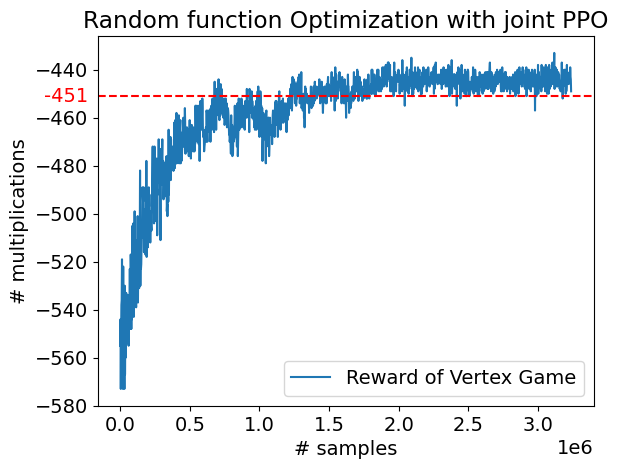

In [4]:
import jax
import jax.numpy as jnp

import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 14}

plt.rc('font', **font)


data = np.genfromtxt("g_PPO_good_run.csv", delimiter=",", skip_header=1)
num_samples = data[:, 0]*16*135
num_muls = data[:, 1]

fig, ax = plt.subplots()
ax.plot(num_samples, num_muls, label="Reward of Vertex Game")
ax.axhline(y=-451., color='r', linestyle='--')
ax.set_xlabel("# samples")
ax.set_ylabel("# multiplications")
ax.set_title("Random function Optimization with joint PPO")

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,-451., "{:.0f}".format(-451.), color="red", transform=trans, 
        ha="right", va="center")
ax.legend(loc="lower right")

In [9]:
import graphax
from graphax import jacve
from graphax.perf import plot_performance
from graphax.examples import RoeFlux_1d

In [10]:
# 323 mults
order = [89, 88, 48, 37, 16, 80, 81, 4, 19, 50, 44, 32, 7, 60, 91, 33, 22, 14, 
        25, 61, 27, 6, 15, 93, 5, 45, 77, 83, 39, 12, 92, 79, 75, 53, 2, 69, 1,
        59, 17, 51, 38, 35, 34, 9, 8, 26, 43, 85, 84, 57, 96, 74, 47, 72, 66,
        71, 78, 73, 76, 82, 87, 67, 100, 54, 95, 42, 90, 21, 94, 46, 86, 55, 70,
        49, 29, 52, 41, 28, 40, 31, 23, 13, 3, 68, 65, 64, 30, 18, 36, 24, 56,
        63, 58, 10, 11, 62, 20, 98]

mM_order = [4, 5, 8, 9, 16, 17, 25, 27, 31, 33, 38, 43, 44, 45, 69, 84, 1, 2,
            10, 13, 18, 21, 26, 28, 32, 34, 37, 39, 42, 47, 50, 53, 57, 59, 
            62, 64, 66, 67, 68, 71, 73, 75, 76, 77, 80, 81, 83, 85, 86, 87, 
            91, 92, 95, 11, 14, 19, 22, 51, 54, 58, 60, 63, 65, 72, 79, 88, 
            90, 93, 96, 3, 6, 7, 15, 29, 40, 56, 61, 74, 78, 82, 48, 89, 94, 
            23, 35, 46, 24, 70, 41, 98, 100, 12, 20, 30, 49, 52, 55, 36]

1 : 1200
2 : 1200
3 : 2400
4 : 600
5 : 600
6 : 2400
7 : 2400
8 : 600
9 : 600
10 : 1200
11 : 1800
12 : 7200
13 : 1800
14 : 1800
15 : 2400
16 : 600
17 : 600
18 : 1200
19 : 1800
20 : 7200
21 : 1800
22 : 1800
23 : 10800
24 : 4800
25 : 600
26 : 1200
27 : 600
28 : 1200
29 : 2400
30 : 21600
31 : 600
32 : 1800
33 : 600
34 : 1800
35 : 3600
36 : 10800
37 : 4800
38 : 2400
39 : 3600
40 : 7200
41 : 25200
42 : 3600
43 : 3600
44 : 2400
45 : 2400
46 : 7200
47 : 3600
48 : 3600
49 : 10800
50 : 3600
51 : 3600
52 : 10800
53 : 3600
54 : 3600
55 : 10800
56 : 2400
57 : 1200
58 : 1800
Post: SparseTensor: 
   shape = (600, 600),
   out_dims = (SparseDimension(id=0, size=600, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=600, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[600])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

Pre: SparseTensor: 
   shape = (600, 600),
   out_dims = (SparseDimension(id=0, size=600, val_dim=0, other_id=1),

100%|██████████| 1000/1000 [00:05<00:00, 178.60it/s]


100 : 1200
98 : 1200
96 : 1200
95 : 1200
94 : 1200
93 : 1200
92 : 1200
91 : 1200
90 : 1200
89 : 1200
88 : 1200
87 : 1200
86 : 1200
85 : 1200
84 : 600
83 : 1200
82 : 1200
81 : 1200
80 : 1200
79 : 1200
78 : 1200
77 : 1200
76 : 1200
75 : 1200
74 : 1200
73 : 1200
72 : 1200
71 : 1200
70 : 3600
69 : 1800
68 : 1200
67 : 1200
66 : 1200
65 : 1200
64 : 1200
63 : 1200
62 : 1200
61 : 2400
60 : 1200
Post: SparseTensor: 
   shape = (600, 600),
   out_dims = (SparseDimension(id=0, size=600, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=600, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[600])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

Pre: SparseTensor: 
   shape = (600, 600),
   out_dims = (SparseDimension(id=0, size=600, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=600, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[600])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [

100%|██████████| 1000/1000 [00:05<00:00, 183.24it/s]


4 : 600
5 : 600
8 : 600
9 : 600
16 : 600
17 : 600
25 : 600
27 : 600
31 : 600
33 : 600
38 : 600
43 : 600
44 : 600
45 : 600
69 : 600
84 : 600
1 : 1200
2 : 1200
10 : 1200
13 : 1200
18 : 1200
21 : 1200
26 : 1200
28 : 1200
32 : 1200
34 : 1200
37 : 1200
39 : 1200
42 : 1200
47 : 1200
50 : 1200
53 : 1200
57 : 1200
Post: SparseTensor: 
   shape = (600, 600),
   out_dims = (SparseDimension(id=0, size=600, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=600, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[600])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

Pre: SparseTensor: 
   shape = (600, 600),
   out_dims = (SparseDimension(id=0, size=600, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=600, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[600])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

num_muls: 600
Post: SparseTensor: 
   shape = (600, 600

100%|██████████| 1000/1000 [00:05<00:00, 181.38it/s]


89 : 1200
88 : 1200
48 : 1200
37 : 1200
16 : 600
80 : 1200
81 : 1200
4 : 600
19 : 1200
50 : 1200
44 : 600
32 : 1200
7 : 2400
60 : 1200
91 : 1200
33 : 600
22 : 1200
14 : 1200
25 : 600
61 : 2400
27 : 600
6 : 2400
15 : 2400
93 : 1200
5 : 1200
45 : 600
77 : 1200
83 : 1200
39 : 1200
12 : 2400
92 : 1200
79 : 1200
75 : 1200
53 : 1200
2 : 1200
69 : 600
1 : 1200
Post: SparseTensor: 
   shape = (600, 600),
   out_dims = (SparseDimension(id=0, size=600, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=600, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[600])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

Pre: SparseTensor: 
   shape = (600, 600),
   out_dims = (SparseDimension(id=0, size=600, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=600, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[600])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

num_mul

100%|██████████| 1000/1000 [00:04<00:00, 223.05it/s]


fwd mean: 3.8236873149871826, rev mean: 3.6495230197906494, cc_mean: 2.9825470447540283, mM_mean: 3.825319290161133
fwd std: 0.2087354212999344, rev std: 0.39476415514945984, cc_std: 0.6004145741462708, mM_std: 0.47684094309806824


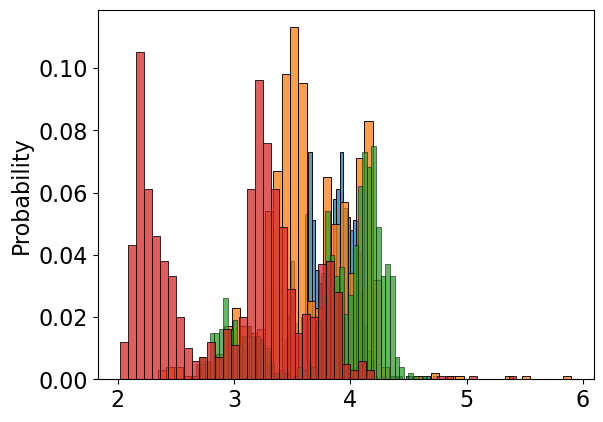

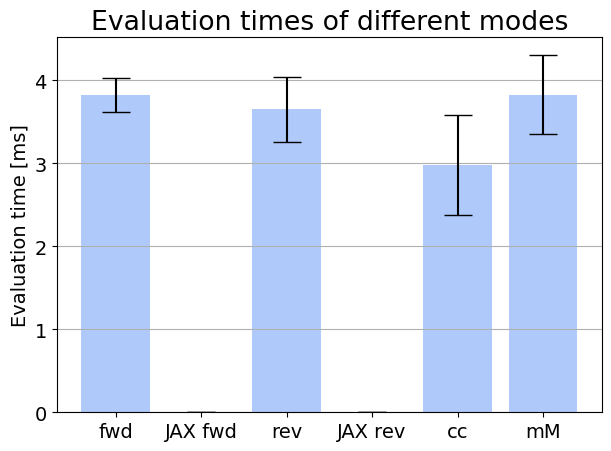

In [31]:
shape = (600,)
xs = [.01, .02, .02, .01, .03, .03]
xs = [jnp.ones(shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
plot_performance(RoeFlux_1d, xs, order, mM_order, "./RoeFlux.png", samplesize=1000)

### The best
fwd mean: 3.8236873149871826, rev mean: 3.6495230197906494, cc_mean: 2.9825470447540283, mM_mean: 3.825319290161133
fwd std: 0.2087354212999344, rev std: 0.39476415514945984, cc_std: 0.6004145741462708, mM_std: 0.47684094309806824

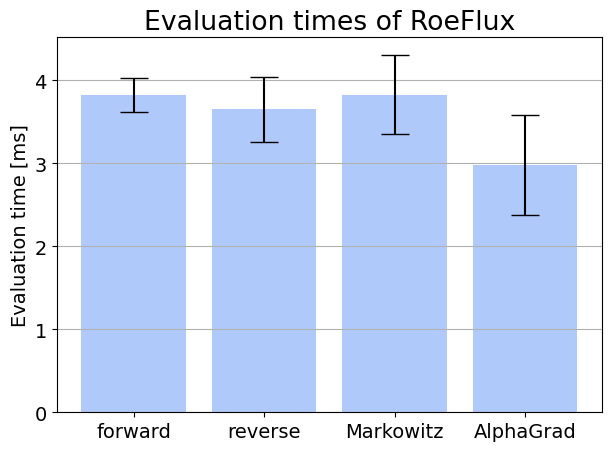

In [33]:
# Order: fwd, rev, mM, cc
means = jnp.array([3.8236873149871826, 3.6495230197906494, 3.825319290161133, 2.9825470447540283])
stds = jnp.array([0.2087354212999344, 0.39476415514945984, 0.47684094309806824, 0.6004145741462708])
x_pos = jnp.arange(len(means))
modes = ["forward", "reverse", "Markowitz", "AlphaGrad"]


fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, 
            ecolor="black", color="#6096f6", capsize=10)
    
ax.set_ylabel("Evaluation time [ms]", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(modes, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_title(f"Evaluation times of RoeFlux")
ax.yaxis.grid(True)  
# ax.set_ylim((0.025, 0.04))

plt.tight_layout()